In [8]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bvh_converter import bvh_mod
from scipy.signal import savgol_filter

from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

# from utils_trajectory.trajectory_by_subdiv import plot_foot_trajectories_by_subdiv
# from utils_trajectory.trajectory_by_beat import plot_foot_trajectories_by_beat
from utils_trajectory.trajectory_cycle import plot_all_cycles_trajectories
from utils_pipeline.pipeline_A import *
from utils_pipeline.pipeline_B import *


### Visualize trajectories with thresholding and average

count of included trajectories:  19
count of excluded trajectories:  0
[(15.343888888666667, 17.36611111066667), (17.36611111066667, 19.324333333), (19.324333333, 21.264777777666666), (21.264777777666666, 23.273666666), (23.273666666, 25.221222221666665), (25.221222221666665, 27.259), (27.259, 29.283444444333337), (29.283444444333337, 31.33411111066667), (31.33411111066667, 33.37855555533333), (33.37855555533333, 35.39011111066666), (35.39011111066666, 37.4549999995), (37.4549999995, 39.468333333), (39.468333333, 41.504333333), (41.504333333, 43.50211111066667), (43.50211111066667, 45.52699999966666), (45.52699999966666, 47.5096666665), (47.5096666665, 49.454111110666666), (49.454111110666666, 51.381222222), (51.381222222, 53.403444444)]


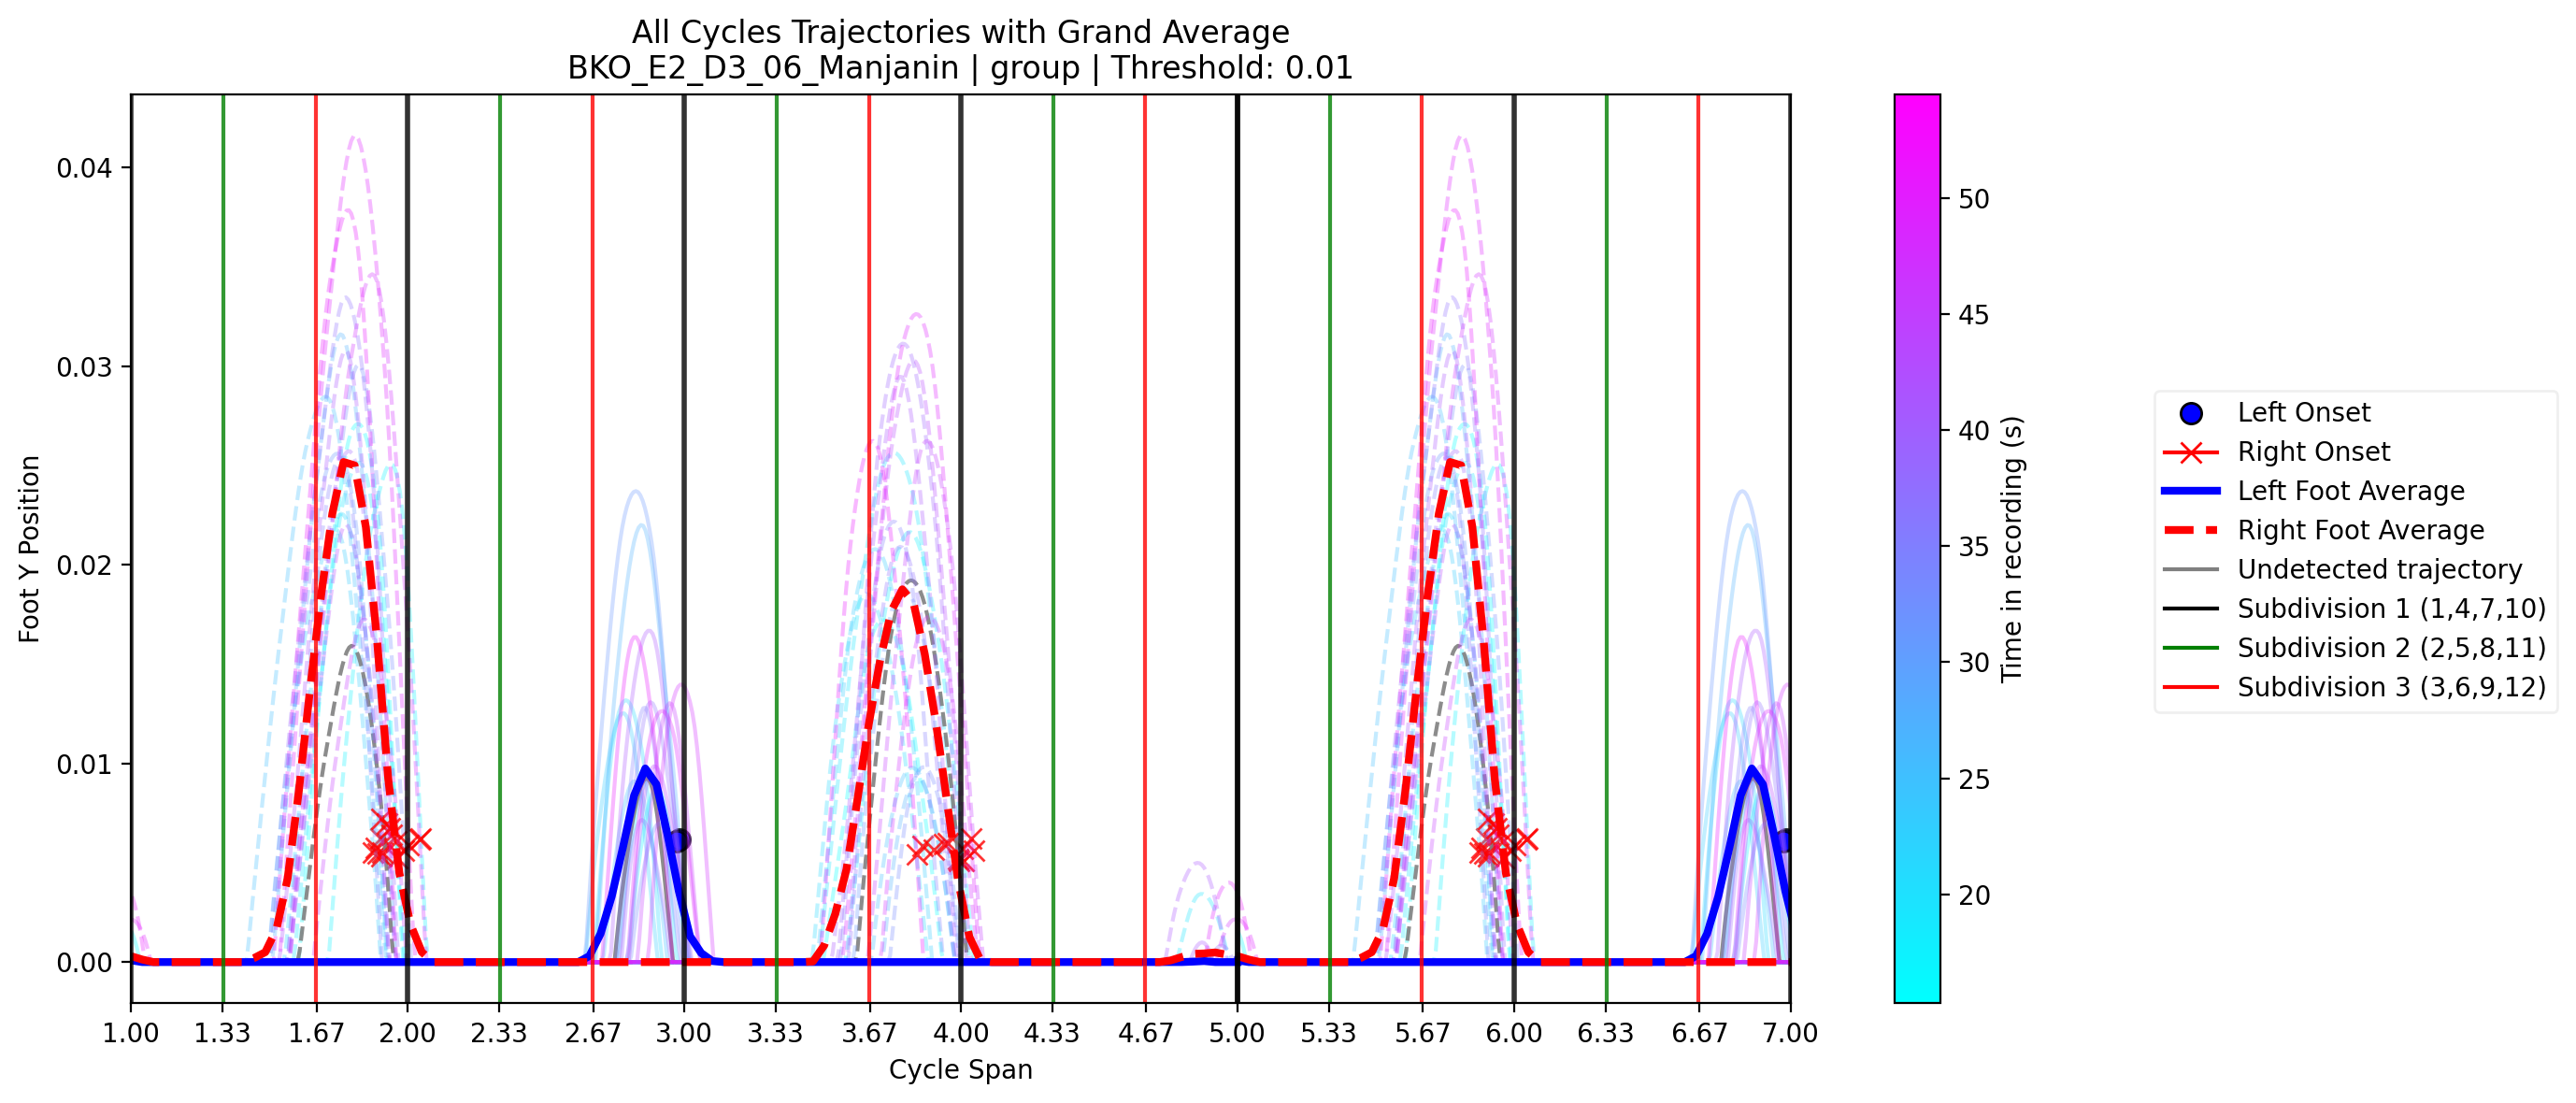

In [9]:
file_name = "BKO_E2_D3_06_Manjanin" # "BKO_E1_D1_02_Maraka"   # "BKO_E2_D3_06_Manjanin"
mode_df = pd.read_csv("data/subset_dance_annotation/" + file_name + "_Dancers.csv")

mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

# dict of segments
segments = {
    "group":      get_segments(mode_group,      "gr"),
    "individual": get_segments(mode_individual, "in"),
    "audience":   get_segments(mode_audience,   "au")
}


mode_name, segmnt = get_tsegment_for("group", mode_group,      "gr")
# mode_name, segmnt = get_tsegment_for("individual", mode_individual, "in")
# mode_name, segmnt   = get_tsegment_for("audience",   mode_audience,   "au")

traj_threshold = 0.01
fig, ax = plot_all_cycles_trajectories(
            file_name=file_name,
            mode=mode_name,
            base_path_cycles="data/virtual_cycles",
            base_path_logs= "data/logs_v3_0.2__lower_jun3",         # "data/logs_v2_may",
            time_segments=segmnt,  # Pass all time segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            traj_threshold= traj_threshold,     # exclude trajectories below this threshold
            show_gray_plots= True,
            show_trajectories= True,  # New parameter to control trajectory lines
            show_vlines= False        # New parameter to control vertical lines
        )

plt.show(fig)

# save_dir = f"output_static_plot/all_cycles_trajectories/{file_name}"
# fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"))
# plt.close(fig)

### Prepare window around beats and subdivision

In [11]:
traj_dir  = "traj_files"
status    = "included"   # or "excluded"
# file_name = "BKO_E1_D1_02_Maraka"
# value     = "0.4"        # or any other threshold

cycle_segs, windows = compute_windows(traj_dir, file_name, status, traj_threshold)

Loaded cycle_segments from BKO_E2_D3_06_Manjanin_included_0.01.pkl
cycle_segments: [(15.343888888666667, 17.36611111066667), (17.36611111066667, 19.324333333), (19.324333333, 21.264777777666666), (21.264777777666666, 23.273666666), (23.273666666, 25.221222221666665), (25.221222221666665, 27.259), (27.259, 29.283444444333337), (29.283444444333337, 31.33411111066667), (31.33411111066667, 33.37855555533333), (33.37855555533333, 35.39011111066666), (35.39011111066666, 37.4549999995), (37.4549999995, 39.468333333), (39.468333333, 41.504333333), (41.504333333, 43.50211111066667), (43.50211111066667, 45.52699999966666), (45.52699999966666, 47.5096666665), (47.5096666665, 49.454111110666666), (49.454111110666666, 51.381222222), (51.381222222, 53.403444444)]
Number of windows for each beat/subdivision:
  beat_1: 19 windows
  beat_2: 19 windows
  beat_3: 19 windows
  beat_4: 19 windows
  subdiv_2: 19 windows
  subdiv_3: 19 windows
  subdiv_5: 19 windows
  subdiv_6: 19 windows
  subdiv_8: 19 wind

### Generate trajectory video + dance video plots

In [12]:
w_key = "beat_1"
vid_plot_path = f"cycle_videos/{file_name}/{w_key}/"

traj_tuples = random.sample(windows[w_key], 5)  # Randomly sample 2 tuples from the list

# traj_tuples = windows[w_key][0:nb]
print(windows.keys())
print(len(windows[w_key]))

dict_keys(['beat_1', 'beat_2', 'beat_3', 'beat_4', 'subdiv_2', 'subdiv_3', 'subdiv_5', 'subdiv_6', 'subdiv_8', 'subdiv_9', 'subdiv_11', 'subdiv_12'])
19


In [13]:
extract_cycle_videos_and_plots(
    file_name = file_name,
    windows = traj_tuples,  # List of (win_start, win_end, t_poi) tuples
    window_key = w_key,
    base_path_logs = "data/logs_v4_0.007_foot_jun3",            # logs_v4_0.007_foot_jun3       logs_v2_may
    figsize = (10, 3),
    dpi = 200,
    )

Windows data:
Window 1:
  Start: 41.477
  End: 45.527
  POI: 43.502
  Duration: 4.050
Window 2:
  Start: 27.233
  End: 31.334
  POI: 29.283
  Duration: 4.101
Window 3:
  Start: 23.183
  End: 27.259
  POI: 25.221
  Duration: 4.076
Window 4:
  Start: 31.367
  End: 35.390
  POI: 33.379
  Duration: 4.023
Window 5:
  Start: 19.256
  End: 23.274
  POI: 21.265
  Duration: 4.018

Foot data ranges:
Left foot time range: 14.921 to 273.788
Right foot time range: 0.750 to 272.929
Number of left foot onsets: 155
Number of right foot onsets: 143

Processing 5 windows
Total frames in trajectory data: 65886
Time range in trajectory data: 0.000 to 274.521

Processing window 1:
  Window time range: 41.477 to 45.527
  Found 1 left foot onsets and 4 right foot onsets
  Left foot onset times: [44.5]
  Right foot onset times: [41.96666667 43.         43.95833333 45.04583333]
  Video frames: 2073 to 2276 (50fps)
  Trajectory frames: 9954 to 10926 (240fps)
  Trajectory data points: 972

Video extraction:
Inpu

In [14]:
concatenate_and_overlay_videos(file_name, vid_plot_path)

Creating concatenation files...
Concatenated plot saved: cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_plot.mp4
Concatenated video saved: cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_video.mp4



### Combine Videos

In [15]:
concat_plot = os.path.join(vid_plot_path, "concatenated_plot.mp4")  # size 2000 by 600
concat_video = os.path.join(vid_plot_path, "concatenated_video.mp4") # 1920 by 1080

view_videos = {
    'concatenated_video': concat_video,  # Your concatenated video path
    'concatenated_plot': concat_plot,    # Your concatenated plot path
}

layout = [
    {'view': 'concatenated_video', 'x': 0, 'y': 0, 'width': 1920, 'height': 540},
    {'view': 'concatenated_plot', 'x': 0, 'y': 540, 'width': 1920, 'height': 540}
]

final_output = combine_trajectory_views(
    filename= file_name,
    output_dir= vid_plot_path,
    view_videos= view_videos,
    layout_config= layout,
    video_size= (1920, 1280),
    fps=24
)


Video 1 info:
{
    "programs": [

    ],
    "streams": [
        {
            "width": 1920,
            "height": 1080,
            "r_frame_rate": "50/1"
        }
    ]
}


Video 2 info:
{
    "programs": [

    ],
    "streams": [
        {
            "width": 2000,
            "height": 600,
            "r_frame_rate": "50/1"
        }
    ]
}


Preparing to combine videos:
Output file: cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/final_combined_BKO_E2_D3_06_Manjanin.mp4
Frame rate: 24 fps
Number of input files: 2
Video dimensions: 1920x540 for each video
Input video 1: cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_video.mp4
Input video 2: cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_plot.mp4

FFmpeg command:
ffmpeg -y -i cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_video.mp4 -i cycle_videos/BKO_E2_D3_06_Manjanin/beat_1/concatenated_plot.mp4 -filter_complex [0:v]scale=1920:540:force_original_aspect_ratio=1,pad=1920:540:(ow-iw)/2:(oh-ih)/2[v0];[1:v]sc